# Read GeoTIFF files with the `GeoTiff` class

This notebook describes how to open a GeoTIFF file
with the `GeoTiff` class included in the `bmi-geotiff` package.

## Setup

To ensure all dependencies are met, set up a conda environment using the environment file found in the root directory of this repository:
```
conda env create --file=environment.yml
```

Then install the `bmi-geotiff` package:
```
make install
```

## Open a file

Import the `GeoTiff` class from the `bmi-geotiff` package:

In [1]:
from bmi_geotiff import GeoTiff

`GeoTiff` uses the open source [xarray](https://xarray.pydata.org) and [rasterio](https://rasterio.readthedocs.io) packages to open, read, and store data and metadata from GeoTIFF files.

Create an instance of `GeoTiff`:

In [2]:
tif = GeoTiff()

The `GeoTiff` class operates on local files. (It doesn't fetch them from the internet.)
Here, we'll use the test file [RGB.byte.tif](https://github.com/mapbox/rasterio/raw/master/tests/data/RGB.byte.tif) from the rasterio project.
It's included in the examples directory of the [bmi-geotiff repository](https://github.com/csdms/bmi-geotiff),
but if you don't have it locally, click the link above to download it.

Open the file with the `GeoTiff` instance:

In [3]:
tif_file = "RGB.byte.tif"
tif.open(tif_file)

The data (and metadata) from the file are loaded into an `xarray` DataArray.

In [4]:
print(tif.da)

<xarray.DataArray (band: 3, y: 718, x: 791)>
[1703814 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 2.827e+06 2.826e+06 2.826e+06 ... 2.612e+06 2.612e+06
  * x        (x) float64 1.021e+05 1.024e+05 1.027e+05 ... 3.389e+05 3.392e+05
Attributes:
    transform:      (300.0379266750948, 0.0, 101985.0, 0.0, -300.041782729805...
    crs:            +init=epsg:32618
    res:            (300.0379266750948, 300.041782729805)
    is_tiled:       0
    nodatavals:     (0.0, 0.0, 0.0)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area


Note that a file can also be opened on instantiation, eliminating the call to `open`.

## Visualize

Finally, let's visualize the data read from the file.
The steps below are based on [this example](http://xarray.pydata.org/en/stable/examples/visualization_gallery.html#imshow()-and-rasterio-map-projections) from the xarray visualization gallery.

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

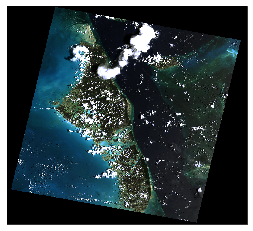

In [6]:
crs = ccrs.UTM('18N')
ax = plt.subplot(projection=crs)
tif.da.plot.imshow(ax=ax, rgb='band', transform=crs)

## Conclusion

The `GeoTiff` class does little more than wrap the existing functionality of xarray and rasterio.
However, it provides a base class that can be wrapped with a [Basic Model Interface](https://bmi.readthedocs.io) (BMI) to create a [CSDMS data component](https://csdms.colorado.edu/wiki/DataComponents) that can be coupled with other components that also expose a BMI.

We'll explore this functionality in a [second notebook](bmi-geotiff.ipynb).